In [1]:
%load_ext autoreload
%autoreload 2

In [20]:
from domino.data.imagenet import get_imagenet_dp
from domino.emb.imagenet import embed_images
import numpy as np
import torch

In [6]:
data_dp = get_imagenet_dp.out().load()

In [17]:
dp = embed_images(
    dp=data_dp.lz[np.random.randint(0, len(data_dp), 100)],
    img_column="image",
    layers={"emb": "layer4"},
).load()


task: embed_images, run_id=37948


In [19]:
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt


--2021-09-27 21:07:19--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2021-09-27 21:07:20 (92.3 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [35]:
probs = dp["output"].data
probs = torch.nn.functional.softmax(probs, dim=0)

with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]

dp["preds"] = list(map(lambda x: categories[x], probs.argmax(dim=1)))

,image_id (PandasSeriesColumn),path (PandasSeriesColumn),split (PandasSeriesColumn),index (PandasSeriesColumn),image (ImageColumn),name (PandasSeriesColumn),synset_pos_offset (PandasSeriesColumn),synset (PandasSeriesColumn),emb (NumpyArrayColumn),output (TensorColumn),preds (PandasSeriesColumn)
0,n02825657_15862,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n02825657/n02825657_15862.JPEG,train,0,,"bell cote, bell cot",n02825657,bell_cote.n.01,"np.ndarray(shape=(2048,))",torch.Tensor(shape=torch.Size([1000])),bell cote
1,n03376595_11565,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n03376595/n03376595_11565.JPEG,train,1,,folding chair,n03376595,folding_chair.n.01,"np.ndarray(shape=(2048,))",torch.Tensor(shape=torch.Size([1000])),patio
2,n09428293_10761,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n09428293/n09428293_10761.JPEG,train,2,,"seashore, coast, seacoast, sea-coast",n09428293,seashore.n.01,"np.ndarray(shape=(2048,))",torch.Tensor(shape=torch.Size([1000])),promontory
3,ILSVRC2012_val_00005851,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/val/ILSVRC2012_val_00005851.JPEG,valid,3,,"television, television system",n04404412,television.n.02,"np.ndarray(shape=(2048,))",torch.Tensor(shape=torch.Size([1000])),entertainment center
4,n01729977_8279,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n01729977/n01729977_8279.JPEG,train,4,,"green snake, grass snake",n01729977,green_snake.n.02,"np.ndarray(shape=(2048,))",torch.Tensor(shape=torch.Size([1000])),green snake
...,...,...,...,...,...,...,...,...,...,...,...
95,n02492035_27,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n02492035/n02492035_27.JPEG,train,95,,"capuchin, ringtail, Cebus capucinus",n02492035,capuchin.n.02,"np.ndarray(shape=(2048,))",torch.Tensor(shape=torch.Size([1000])),capuchin
96,n02095889_2028,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n02095889/n02095889_2028.JPEG,train,96,,"Sealyham terrier, Sealyham",n02095889,sealyham_terrier.n.01,"np.ndarray(shape=(2048,))",torch.Tensor(shape=torch.Size([1000])),Sealyham terrier
97,n02124075_4933,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n02124075/n02124075_4933.JPEG,train,97,,Egyptian cat,n02124075,egyptian_cat.n.01,"np.ndarray(shape=(2048,))",torch.Tensor(shape=torch.Size([1000])),Egyptian cat
98,n12057211_4462,/home/common/datasets/imagenet/ILSVRC/Data/CLS-LOC/train/n12057211/n12057211_4462.JPEG,train,98,,"yellow lady's slipper, yellow lady-slipper, Cypripedium calceolus, Cypripedium parviflorum",n12057211,yellow_lady's_slipper.n.01,"np.ndarray(shape=(2048,))",torch.Tensor(shape=torch.Size([1000])),yellow lady's slipper

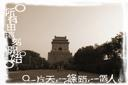
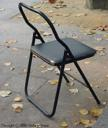
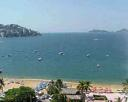
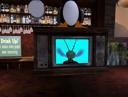
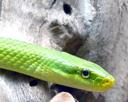
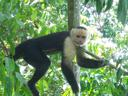
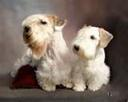
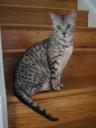
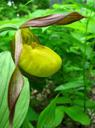
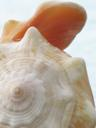

In [36]:
dp

In [38]:
collect_settings.out().load()

,alpha (NumpyArrayColumn),build_setting_kwargs (ListColumn),dataset (PandasSeriesColumn),slice_category (PandasSeriesColumn),slice_names (ListColumn),target_name (PandasSeriesColumn),index (PandasSeriesColumn),setting_id (PandasSeriesColumn)
0,0.0,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.0}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis,0,7f631e49-ed3d-4fe5-bfd8-65828b4f2987
1,0.2,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.2}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis,1,765e0bd2-2c6e-48c2-a4ee-e04b23bd929a
2,0.4,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.4}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis,2,2b6f38ca-420d-454d-9ad3-bff22f682d52
3,0.6,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.6000000000000001}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis,3,9193d4e4-d014-4645-bc54-1fcbcad1e9fc
4,0.8,"{'n': 30000, 'correlate': 'cardiomegaly', 'target': 'atelectasis', 'corr': 0.8}",mimic,correlation,"['atelectasis=0_cardiomegaly=1', 'atelectasis=1_cardiomegaly=0']",atelectasis,4,fbde748b-2b20-4c07-891d-f7d11d222f7b
...,...,...,...,...,...,...,...,...
215,0.0,"{'n': 30000, 'correlate': 'pleural_group', 'target': 'cardio_group', 'corr': 0.0}",mimic,correlation,"['cardio_group=0_pleural_group=1', 'cardio_group=1_pleural_group=0']",cardio_group,215,36f32e53-453f-47e3-be49-469ddb500228
216,0.2,"{'n': 30000, 'correlate': 'pleural_group', 'target': 'cardio_group', 'corr': 0.2}",mimic,correlation,"['cardio_group=0_pleural_group=1', 'cardio_group=1_pleural_group=0']",cardio_group,216,27da6e31-c3b4-48c3-be59-8aaf5df7f578
217,0.4,"{'n': 30000, 'correlate': 'pleural_group', 'target': 'cardio_group', 'corr': 0.4}",mimic,correlation,"['cardio_group=0_pleural_group=1', 'cardio_group=1_pleural_group=0']",cardio_group,217,5f9463b3-3e53-4e3f-980b-600a0ef0a1e5
218,0.6,"{'n': 30000, 'correlate': 'pleural_group', 'target': 'cardio_group', 'corr': 0.6000000000000001}",mimic,correlation,"['cardio_group=0_pleural_group=1', 'cardio_group=1_pleural_group=0']",cardio_group,218,12b59237-eff7-4b14-925f-eb7aff8d3110


In [39]:
import psutil

In [41]:
psutil.numcpus()

AttributeError: module 'psutil' has no attribute 'numcpus'

In [42]:
import ray
ray.get_gpu_ids()

2021-09-27 22:07:35,466	INFO services.py:1250 -- View the Ray dashboard at http://127.0.0.1:8265
2021-09-27 22:07:35,881	WARNING worker.py:499 -- `ray.get_gpu_ids()` will always return the empty list when called from the driver. This is because Ray does not manage GPU allocations to the driver process.


[]

In [43]:
import torch
use_cuda = torch.cuda.is_available()


In [44]:
use_cuda

True

In [45]:
torch.cuda.device_count()

1

In [47]:
import psutil
psutil.cpu_count()

8